<a href="https://colab.research.google.com/github/ltpdo/PythonMachineLearningProgramming/blob/Perceptron/%E5%88%86%E9%A1%9E%E5%95%8F%E9%A1%8C_%E5%8D%98%E7%B4%94%E3%81%AA%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%82%A2%E3%83%AB%E3%82%B4%E3%83%AA%E3%82%BA%E3%83%A0%E3%81%AE%E8%A8%93%E7%B7%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.2

In [ ]:
import numpy as np

In [24]:
class Perception(object):
  """ パーセプトロンの分類器

  パラメータ
  --------------------------
  eta : float
      学習率(0.0より大きく1.0以下の値)
  n_iter : int
      訓練データの訓練回数
  random_state : int
      重みを初期化するための乱数シード

  属性
  --------------------------
  w_ : 1次元配列
      適応後の重み
  errors_ : リスト
      各工ポックでの誤分類(更新)の数

  """

  def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state = 0

  def fit(self, X, y):
    """ 訓練データに適合させる

    パラメータ
    --------------------------
    X : {配列のようなデータ構造}, shape = [n_examples, n_features]
    訓練データ
    n_examplesは訓練データの個数、n_featuresは特徴量の個数
    y : 配列のようなデータ構造、shape = [n_examples]
    目的変数

    戻り値
    ---------------
    self : object

    """

    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.errors_ = []

    for _ in range(self.n_iter): # 訓練回数分まで訓練データを反復
      errors = 0
      for xi, target in zip(X, y): # 各訓練データで重みを更新
        # 重み wの更新
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        # 重みの更新が０でない場合は誤分類としてカウント
        errors += int(update != 0.0)
      # 反復ごとの誤差を格納
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    """挿入力を計算"""
    return np.dot(X, self.w_[1:] + self.w_[0])

  def predict(self, X):
    """１ステップ後のクラスラベルを返す"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

In [4]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

# 2.3

In [9]:
import  os
import pandas as pd
from posixpath import join

s = join("https://archive.ics.uci.edu", "ml", "machine-learning-databases", "iris", "iris.data")

print("URL:", s)

df = pd.read_csv(s, header = None, encoding = "utf-8")
df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


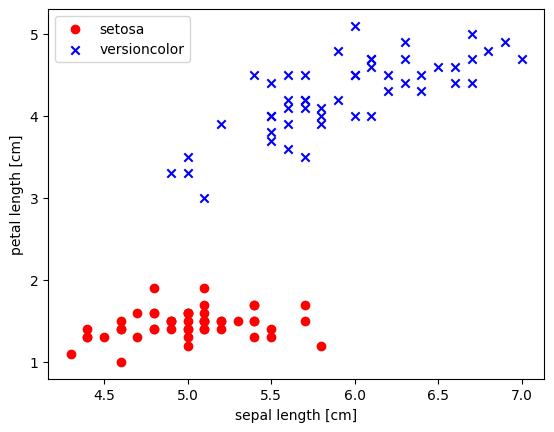

In [22]:
import matplotlib.pyplot as plt

# 1-100行目の目的変数の抽出
y = df.iloc[0:100, 4].values
# Iris-sectosaを-1, Iris-versicolorを1に変換
y = np.where(y == "Iris-setosa", -1, 1)
# 1-100行目の1,3列目の抽出
X = df.iloc[0:100, [0, 2]].values
# 品種 setosaのプロット(赤の〇)
plt.scatter(X[:50, 0], X[:50, 1], color = "red", marker = "o", label = "setosa")
# 品種 versicolorのプロット(青の×)
plt.scatter(X[50:100, 0], X[50:100, 1], color = "blue",marker = "x", label = "versioncolor")
# 軸のラベルの設定

plt.xlabel("sepal length [cm]")
plt.ylabel("petal length [cm]")
# 汎例の設定
plt.legend(loc = "upper left")
# 図の表示
plt.show()

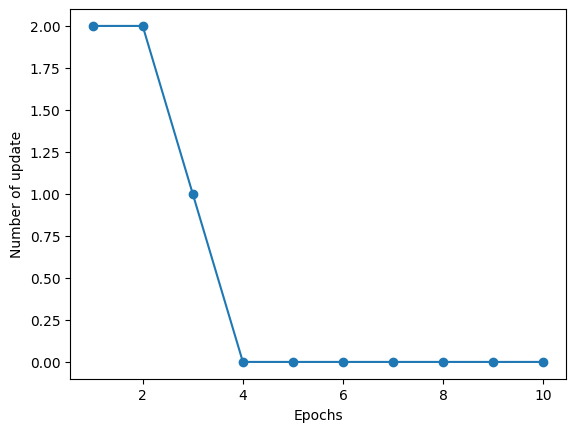

In [26]:
# パーセプトロンのオブジェクトの生成(インスタンス化)
ppn = Perception(eta = 0.1, n_iter = 10)
# 訓練データへのモデルの適合
ppn.fit(X, y)
# エポックと誤分類の関係を表す折れ線グラフをプロット
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = "o")
# 軸ラベルの設定
plt.xlabel("Epochs")
plt.ylabel("Number of update")
# 図の表示
plt.show()

In [28]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
  # マーカーとカラーマップの準備
  markers = ("s", "x", "o", "^", "v")
  colors = ("red", "blue", "lightgreen", "gray", "cyan")
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # 決定領域のプロット
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  # グリッドポイントの生成
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))

  # 各特徴量尾を1次元配列に変換して予測を実行
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  # 予測結果をもとのグリッドポイントのデータサイズに変換
  Z = Z.reshape(xx1.shape)
  # グリッドポイントの等高線のプロット
  plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
  # 軸の範囲の設定
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # クラスごとに訓練データをプロット
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8, c = colors[idx], marker = markers[idx], label = cl, edgecolor = "black")

<ipython-input-28-374d77e6229b>:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8, c = colors[idx], marker = markers[idx], label = cl, edgecolor = "black")


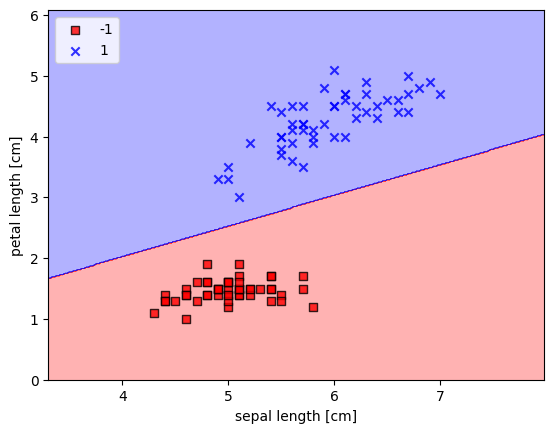

In [29]:
# 決定領域のプロット
plot_decision_regions(X, y, classifier = ppn)
# 軸ラベルの設定
plt.xlabel("sepal length [cm]")
plt.ylabel("petal length [cm]")
# 凡例の設定
plt.legend(loc = "upper left")
# 図の表示
plt.show()

# 2.5

In [ ]:
class AdalineGD(object):
  """ADAptive Linear NEuron分類器

  パラメータ
  -------------------------------
  eta : float
      学習率(0.0より大きく1.0以下の値)
  n_iter : int
      訓練データの訓練回数
  random_state : int
      重みを初期化するための乱数シード

  属性
  -----------------------------
  w_ : 1次元配列
      適応後の重み
  cost_ : リスト
      各工エポックでの誤差平均和のコスト関数
  """

  def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """ 訓練データに適合させる

    パラメータ
    ---------------------------
    X : {配列のようなデータ構造}, shape = [n_examples, n_features]
        訓練データ
    y : 配列のようなデータ構造, shape = [n_examples]
        目的変数

    戻り値
    -----------
    self : object
    """

    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter): # 訓練回数分まで訓練データを反復
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors ** 2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(se)